## Background
- The dataset contains 5336 records of rental properties around 7 locations in Lagos. The dataset was sourced from a Nigeria real-estate company website.

### Problem Statement
- The real estate company want to predict the prices of houses in Lagos

In [1]:
## import libraries
import pandas as pd
import numpy as np

# for visuals
import seaborn as sns
import matplotlib.pyplot as  plt

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
# import and read file
df = pd.read_csv(r"C:\Users\benke\Downloads\lagos_house_prices_raw.csv")
df

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
1,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
2,yaba,1,1,2,650000.0,Mini flat,0,0,0,0,0,0,0,0,0
3,yaba,1,1,1,450000.0,Mini flat,0,0,0,0,0,0,0,0,0
4,yaba,3,3,4,800000.0,Detached duplex,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,ajah,1,1,2,600000.0,Mini flat,1,0,0,0,0,0,0,0,0
5332,ajah,2,2,2,700000.0,Mini flat,1,0,0,0,0,0,0,0,0
5333,ajah,4,4,5,1700000.0,Semi detached duplex,1,0,0,0,0,0,0,0,0
5334,ajah,1,1,2,500000.0,Mini flat,0,0,0,0,0,0,0,0,0


## Data Inspection

In [3]:
# shape of dataset
df.shape

(5336, 15)

In [4]:
# check columns
df.columns.tolist()

['location',
 'bed',
 'bath',
 'toilet',
 'price',
 'Property_Type',
 'Parking_Space',
 'Security',
 'Electricity',
 'Furnished',
 'Security_Doors',
 'CCTV',
 'Pool',
 'Gym',
 'BQ']

In [5]:
# the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        5336 non-null   object 
 1   bed             5336 non-null   int64  
 2   bath            5336 non-null   int64  
 3   toilet          5336 non-null   int64  
 4   price           5336 non-null   float64
 5   Property_Type   5336 non-null   object 
 6   Parking_Space   5336 non-null   int64  
 7   Security        5336 non-null   int64  
 8   Electricity     5336 non-null   int64  
 9   Furnished       5336 non-null   int64  
 10  Security_Doors  5336 non-null   int64  
 11  CCTV            5336 non-null   int64  
 12  Pool            5336 non-null   int64  
 13  Gym             5336 non-null   int64  
 14  BQ              5336 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 625.4+ KB


In [6]:
# check the data types
df.dtypes

location           object
bed                 int64
bath                int64
toilet              int64
price             float64
Property_Type      object
Parking_Space       int64
Security            int64
Electricity         int64
Furnished           int64
Security_Doors      int64
CCTV                int64
Pool                int64
Gym                 int64
BQ                  int64
dtype: object

In [7]:
# check for duplicates
df.duplicated().sum()

3434

In [8]:
# check for missing values
df.isnull().sum()

location          0
bed               0
bath              0
toilet            0
price             0
Property_Type     0
Parking_Space     0
Security          0
Electricity       0
Furnished         0
Security_Doors    0
CCTV              0
Pool              0
Gym               0
BQ                0
dtype: int64

In [9]:
# summary statistics of the data
df.describe().astype('int')

,bed,bath,toilet,price,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
count,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336
mean,1,1,1,645566,0,0,0,0,0,0,0,0,0
std,0,0,0,469305,0,0,0,0,0,0,0,0,0
min,1,1,1,150,0,0,0,0,0,0,0,0,0
25%,1,1,1,350000,0,0,0,0,0,0,0,0,0
50%,1,1,1,500000,0,0,0,0,0,0,0,0,0
75%,1,2,2,800000,0,0,0,0,0,0,0,0,0
max,5,5,5,2450000,1,1,1,1,1,1,1,1,1


*The average price is 645566, the maximum and minimum house price is 2,450,000 and 150, respectively. 75% of the houses in Lagos have their prices below 800,000 while the remaining 25% have their prices above 350,000.*

## Data Preprocessing

###### drop duplicate rows
df.drop_duplicates(keep = 'first', inplace =True)
print('\nDataFrame after dropping duplicate rows: ')
df

In [10]:
# recheck the shape
df.shape

(5336, 15)

In [11]:
# select numerical variables
num_vars = df.select_dtypes(include = ['float', 'int64']).columns.tolist()
print(num_vars)

# value counts for numerical variables
for column in num_vars:
    print(df[column].value_counts())

['bed', 'bath', 'toilet', 'price', 'Parking_Space', 'Security', 'Electricity', 'Furnished', 'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ']
bed
1    4051
2     611
3     541
4     127
5       6
Name: count, dtype: int64
bath
1    3769
2     927
3     472
4     153
5      15
Name: count, dtype: int64
toilet
1    3242
2    1254
3     470
4     274
5      96
Name: count, dtype: int64
price
500000.0     491
350000.0     428
400000.0     428
600000.0     360
300000.0     319
            ... 
2100000.0      1
1620000.0      1
2450000.0      1
3000.0         1
1102000.0      1
Name: count, Length: 97, dtype: int64
Parking_Space
0    4685
1     651
Name: count, dtype: int64
Security
0    4778
1     558
Name: count, dtype: int64
Electricity
0    5213
1     123
Name: count, dtype: int64
Furnished
0    5228
1     108
Name: count, dtype: int64
Security_Doors
0    5331
1       5
Name: count, dtype: int64
CCTV
0    5302
1      34
Name: count, dtype: int64
Pool
0    5304
1      32
Name: count, dtype: 

In [12]:
# select categorical variables
cat_vars = df.select_dtypes(include = ['object']).columns.tolist()
print(cat_vars)

# value counts for categorical variables
for column in cat_vars:
    print(df[column].value_counts())

['location', 'Property_Type']
location
yaba             1460
ajah              900
surulere          728
gbagada           692
ikorodu           578
lekki phase 1     521
ikeja             457
Name: count, dtype: int64
Property_Type
Mini flat                 3070
Self contain              1345
Flat / apartment           686
Semi detached duplex        66
Detached duplex             53
Blocks of flats             42
Terraced duplex             38
Detached bungalow           18
Penthouse flat              14
Semi detached bungalow       3
Massionette house            1
Name: count, dtype: int64


## Exploratory Data Analysis

#### Univariate Analysis
- checking the distribution of each singular feature and its visualization.

In [13]:
# How many listing are there per location
count_listing = df['location'].value_counts().sort_values(ascending = False)
count_listing

location
yaba             1460
ajah              900
surulere          728
gbagada           692
ikorodu           578
lekki phase 1     521
ikeja             457
Name: count, dtype: int64

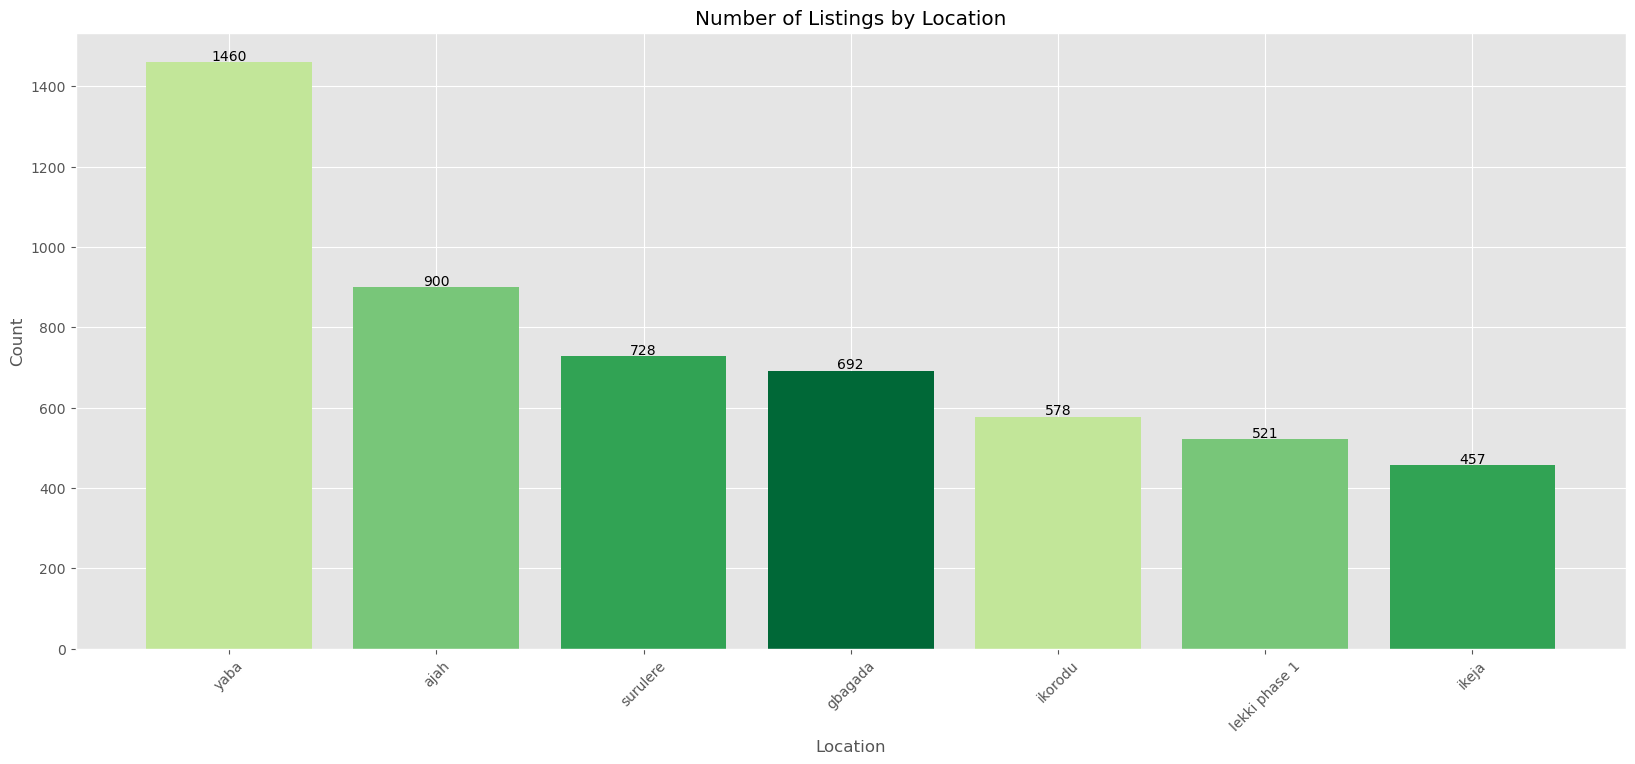

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))

# Define the colors for the bars
colors = ['#c2e699', '#78c679', '#31a354', '#006837']

# Customize the bar chart
ax.bar(count_listing.index, count_listing.values, color=colors)

# Add data labels to the bars
for i, v in enumerate(count_listing.values):
    ax.text(i, v+5, str(v), ha='center')

# Add labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Count')
ax.set_title('Number of Listings by Location')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


*The location with the lowest and highest listing is Ikeja and Yaba, with a total value of 457 and 1460, respectively*

In [15]:
# How many property type do we have across the district of Lagos?
property_type_listing = df['Property_Type'].value_counts().sort_values(ascending = True)
property_type_listing

Property_Type
Massionette house            1
Semi detached bungalow       3
Penthouse flat              14
Detached bungalow           18
Terraced duplex             38
Blocks of flats             42
Detached duplex             53
Semi detached duplex        66
Flat / apartment           686
Self contain              1345
Mini flat                 3070
Name: count, dtype: int64

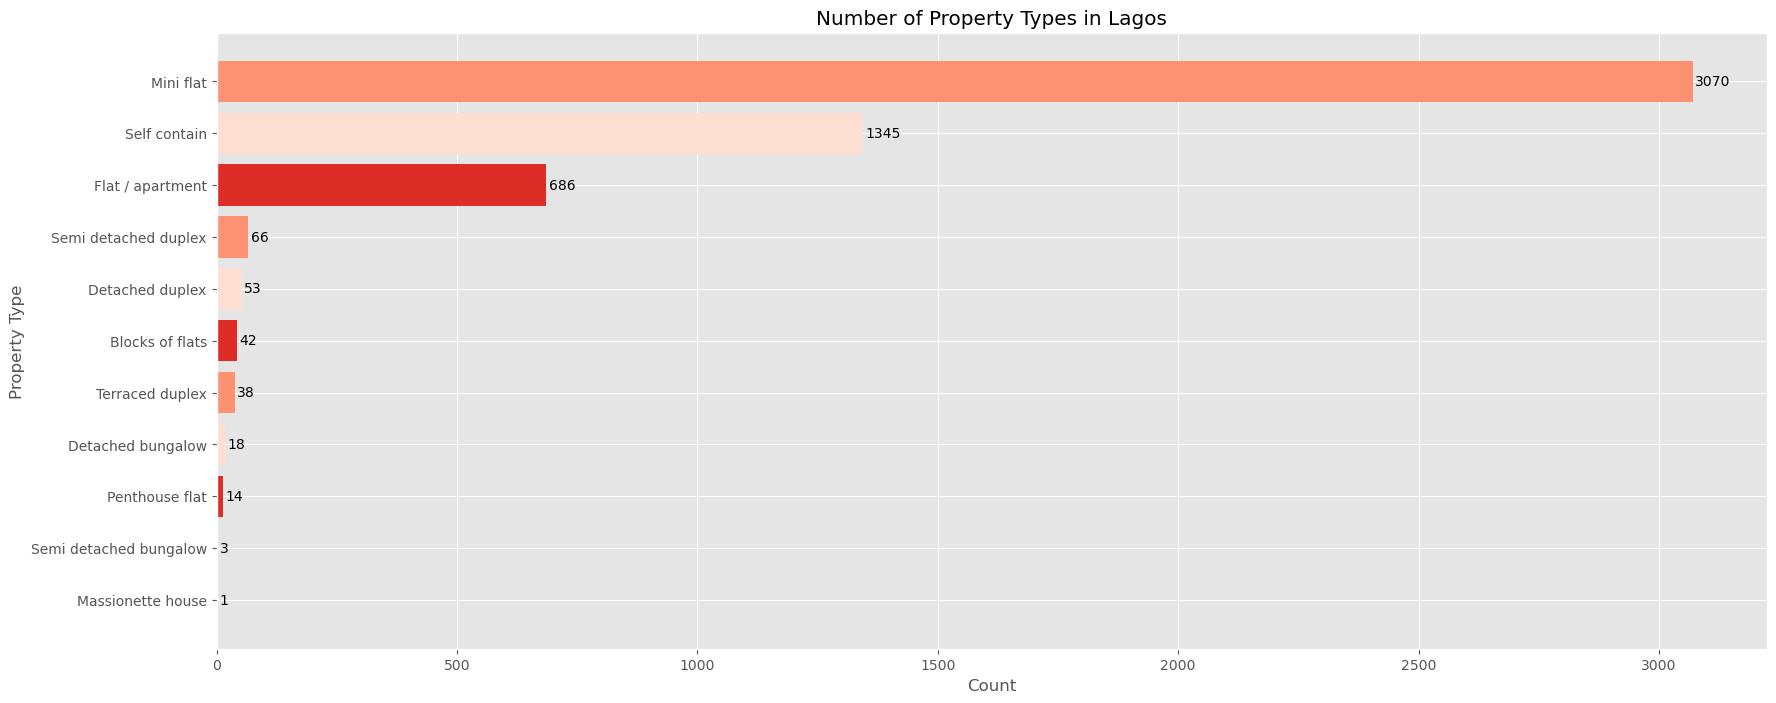

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))

# Define the colors for the bars
colors = ['#fee0d2', '#fc9272', '#de2d26']

# Customize the bar chart
ax.barh(property_type_listing.index, property_type_listing.values, color=colors)

# Add data labels to the bars
for i, v in enumerate(property_type_listing.values):
    ax.text(v+5, i, str(v), ha='left', va='center')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Property Type')
ax.set_title('Number of Property Types in Lagos')

# Show the plot
plt.show()


*There are 11 unique property types in Lagos districts, with the Mini flat having the highest with a total value of 3070 followed by Self contain with a total value of 1345, while the least is Massionette house with total value of 1.*

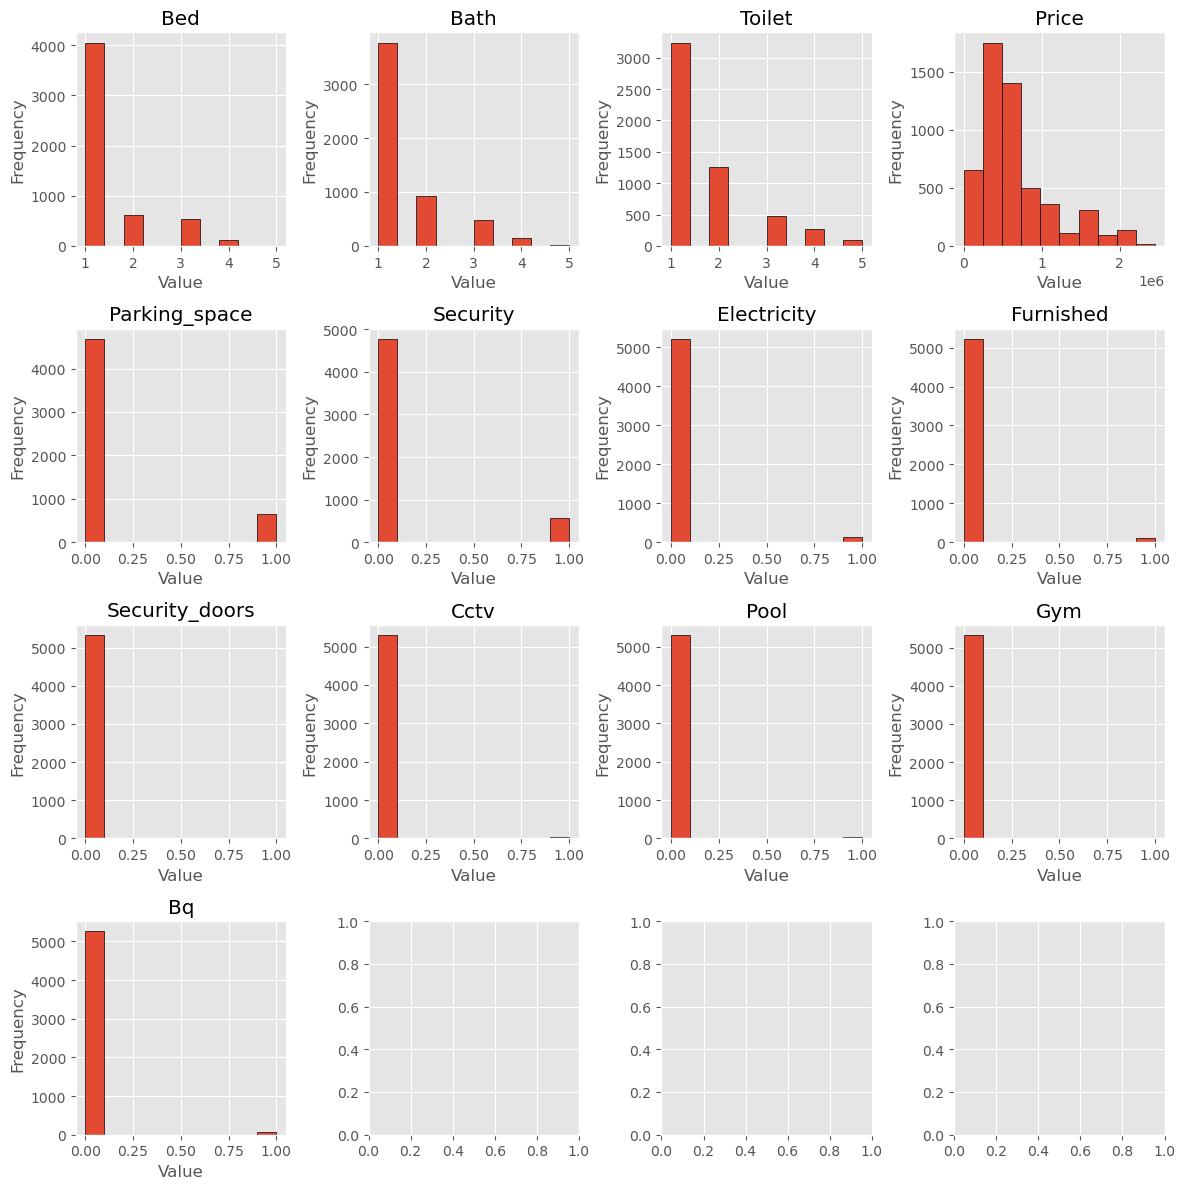

In [17]:
# create a subplot for the distribution of the numerical variables using histogram

# Create a figure and subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the variables and create histograms
for i, variable in enumerate(['bed', 'bath', 'toilet', 'price', 'Parking_Space', 'Security', 'Electricity', 'Furnished', 'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ']):
    ax = axes[i]
    ax.hist(df[variable], bins=10, edgecolor='black')
    ax.set_title(variable.capitalize())
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


*It is observed that most houses in  Lagos have atleast 1 bedroom, 1 bathroom, and  1 toilet, followed by at least 2, respectively.*

*Most residents of Lagos pay a house price from 500,000 and above.*

*Most of the houses in Lagos does not have `parking space, security, electricity, furnished apartments, security doors, cctv facility, swimming pool, gym facility, and BQ,` respectively.*

## Bivariate Analysis
- We are checking the relationship of the distribution between two variables and its visualization.

In [18]:
# Distribution  of prices by location
df.groupby('location')['price'].describe().astype('int')

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
ajah,900,693335,475287,120000,400000,500000,800000,2400000
gbagada,692,742290,451011,150,400000,600000,900000,2300000
ikeja,457,772700,506704,4000,450000,600000,850000,2300000
ikorodu,578,155095,138067,16000,100000,100000,160000,1500000
lekki phase 1,521,1211013,489304,3000,800000,1300000,1500000,2450000
surulere,728,589189,335065,130000,350000,500000,700000,2300000
yaba,1460,550986,331439,250,350000,450000,650000,2000000


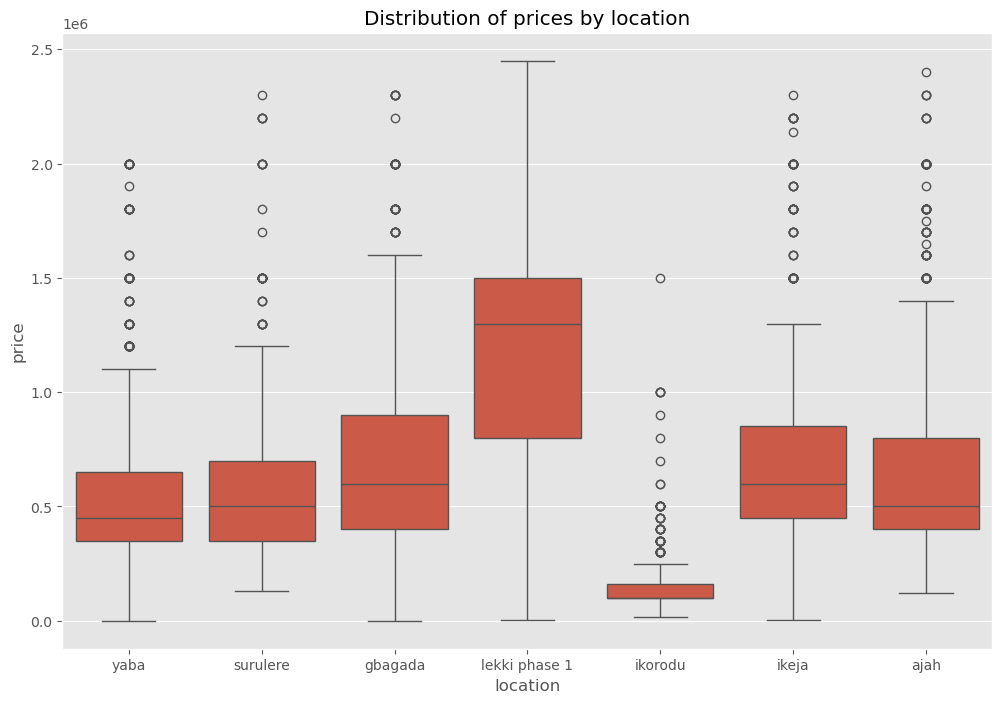

In [19]:
# visualize the charts using boxplot
plt.figure(figsize = (12, 8))
sns.boxplot(x = df['location'], y = df['price'], data = df)
plt.title('Distribution of prices by location')
plt.show()

*Lekki-Phase 1 has the highest lagos house price with an average value of 1.3 million followed by Ikeja with an average value of 600,000 while the least lagos house price is in Ikorodu with an average value of 100,000.*

In [20]:
# Which location is with more security facility like CCTV Camera?
cctv_location = df.groupby('location')['CCTV'].sum().sort_values()
cctv_location

location
lekki phase 1     0
gbagada           1
ajah              3
ikeja             5
yaba              5
ikorodu           8
surulere         12
Name: CCTV, dtype: int64

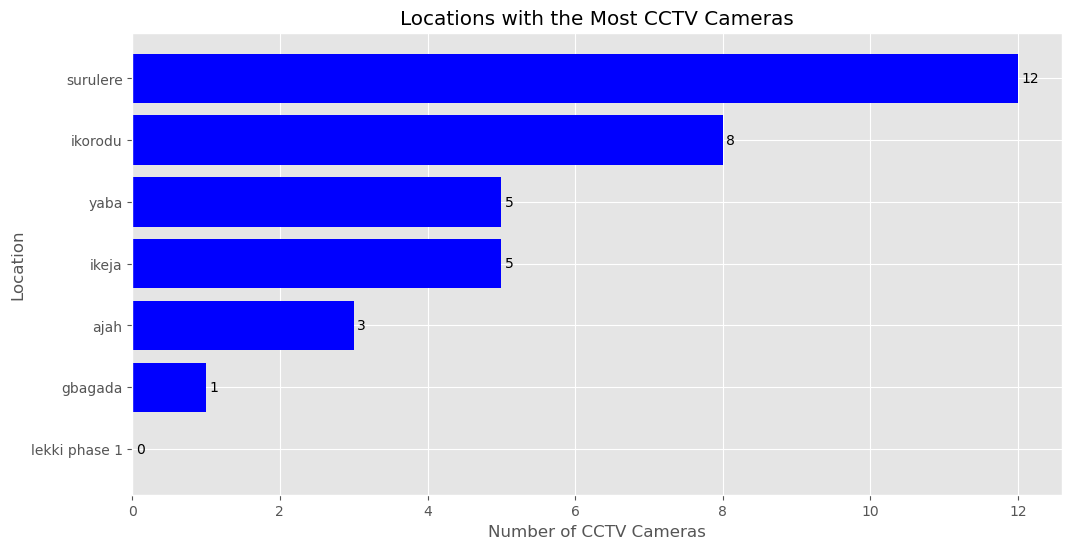

In [21]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Customize the bar chart
ax.barh(cctv_location.index, cctv_location.values, color='blue')

# Add data labels to the bars
for i, v in enumerate(cctv_location.values):
    ax.text(v+0.05, i, str(v), ha='left', va='center')

# Add labels and title
ax.set_xlabel('Number of CCTV Cameras')
ax.set_ylabel('Location')
ax.set_title('Locations with the Most CCTV Cameras')

# Show the plot
plt.show()


*Surulere has the highest number of CCTV facility with ta total number of 12, followed by Ikorodu with a total number of 8 while the least location is Gbagada with 1, and Lekki-Phase 1 with 0.*

In [22]:
# What houses type are the cheapest for the highest number of rooms for families that want affordable housing?
least_house_type_price = df.groupby('Property_Type')['price'].min().astype('int').sort_values(ascending = False)
least_house_type_price 

Property_Type
Massionette house         2200000
Terraced duplex            750000
Penthouse flat             700000
Semi detached bungalow     600000
Blocks of flats            500000
Detached bungalow          400000
Semi detached duplex        60000
Flat / apartment            45000
Detached duplex              4000
Mini flat                    3000
Self contain                  150
Name: price, dtype: int32

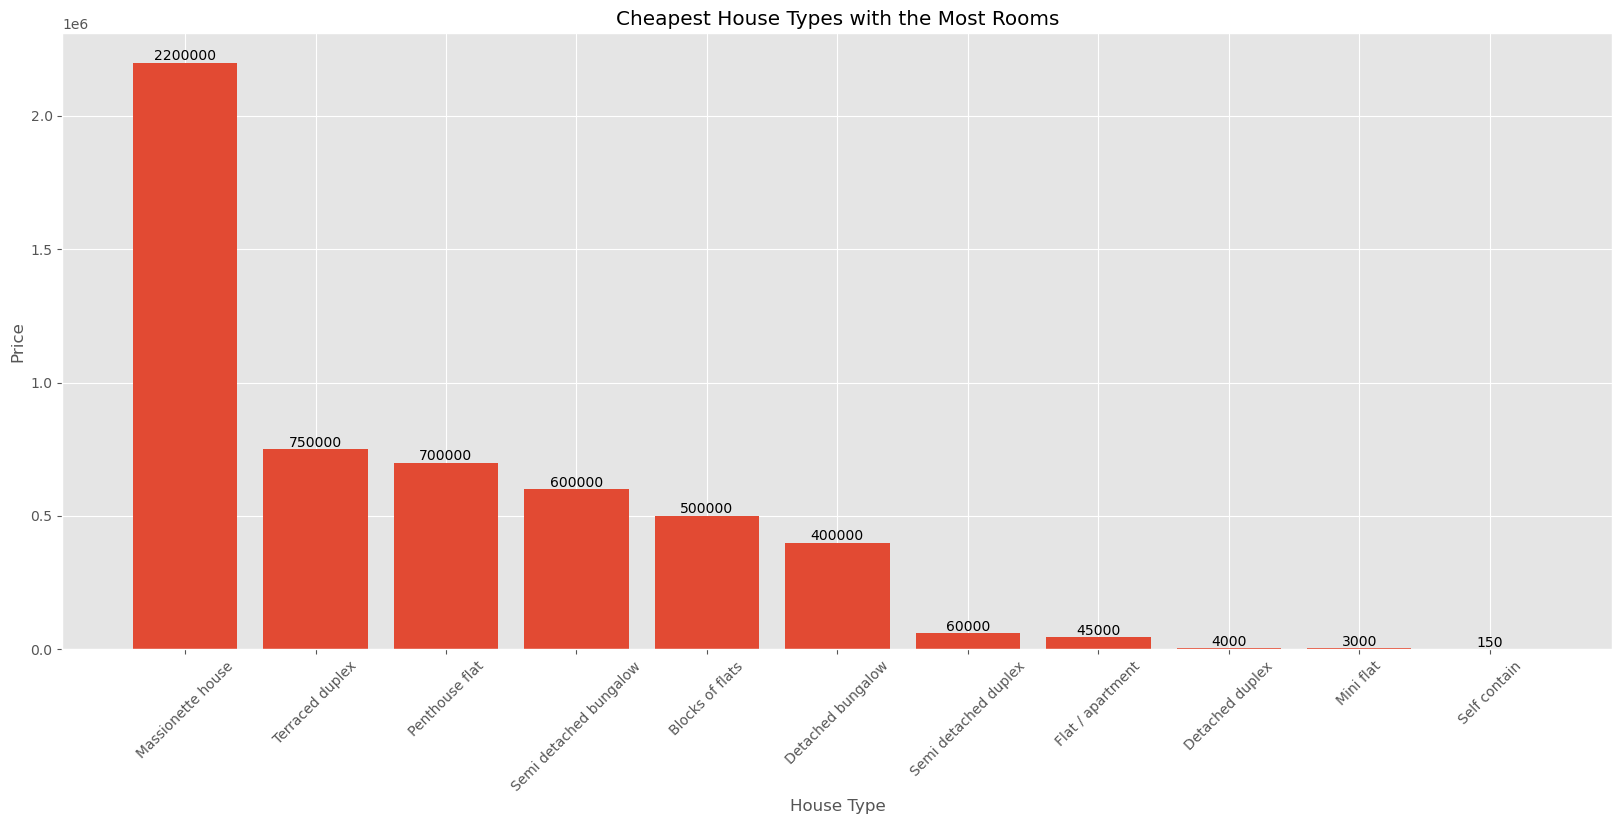

In [23]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 8))

# Customize the bar chart
ax.bar(least_house_type_price.index, least_house_type_price.values)

# Add data labels to the bars
for i, v in enumerate(least_house_type_price.values):
    ax.text(i, v+10000, str(v), ha='center')

# Add labels and title
ax.set_xlabel('House Type')
ax.set_ylabel('Price')
ax.set_title('Cheapest House Types with the Most Rooms')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


*Self contain is the cheapest house type with a minimum price of 150 followed Mini flat with a minimum price of 3000.*

In [24]:
# Location for the cheapest self contain
self_location = df.groupby(['location', 'Property_Type'])['price'].min().unstack('Property_Type')
self_location

Property_Type,Blocks of flats,Detached bungalow,Detached duplex,Flat / apartment,Massionette house,Mini flat,Penthouse flat,Self contain,Semi detached bungalow,Semi detached duplex,Terraced duplex
location,,,,,,,,,,,
ajah,650000.0,600000.0,500000.0,180000.0,NaN,200000.0,700000.0,120000.0,600000.0,900000.0,750000.0
gbagada,650000.0,1000000.0,900000.0,45000.0,NaN,150000.0,800000.0,150.0,NaN,1200000.0,1500000.0
ikeja,1000000.0,1500000.0,4000.0,300000.0,NaN,200000.0,NaN,180000.0,NaN,60000.0,1800000.0
ikorodu,NaN,450000.0,NaN,120000.0,NaN,16000.0,NaN,36000.0,NaN,1000000.0,NaN
lekki phase 1,NaN,400000.0,250000.0,600000.0,2200000.0,3000.0,1600000.0,10000.0,NaN,1500000.0,1600000.0
surulere,500000.0,1500000.0,1000000.0,350000.0,NaN,150000.0,850000.0,130000.0,NaN,2000000.0,NaN
yaba,600000.0,NaN,800000.0,300000.0,NaN,35000.0,800000.0,250.0,NaN,2000000.0,NaN


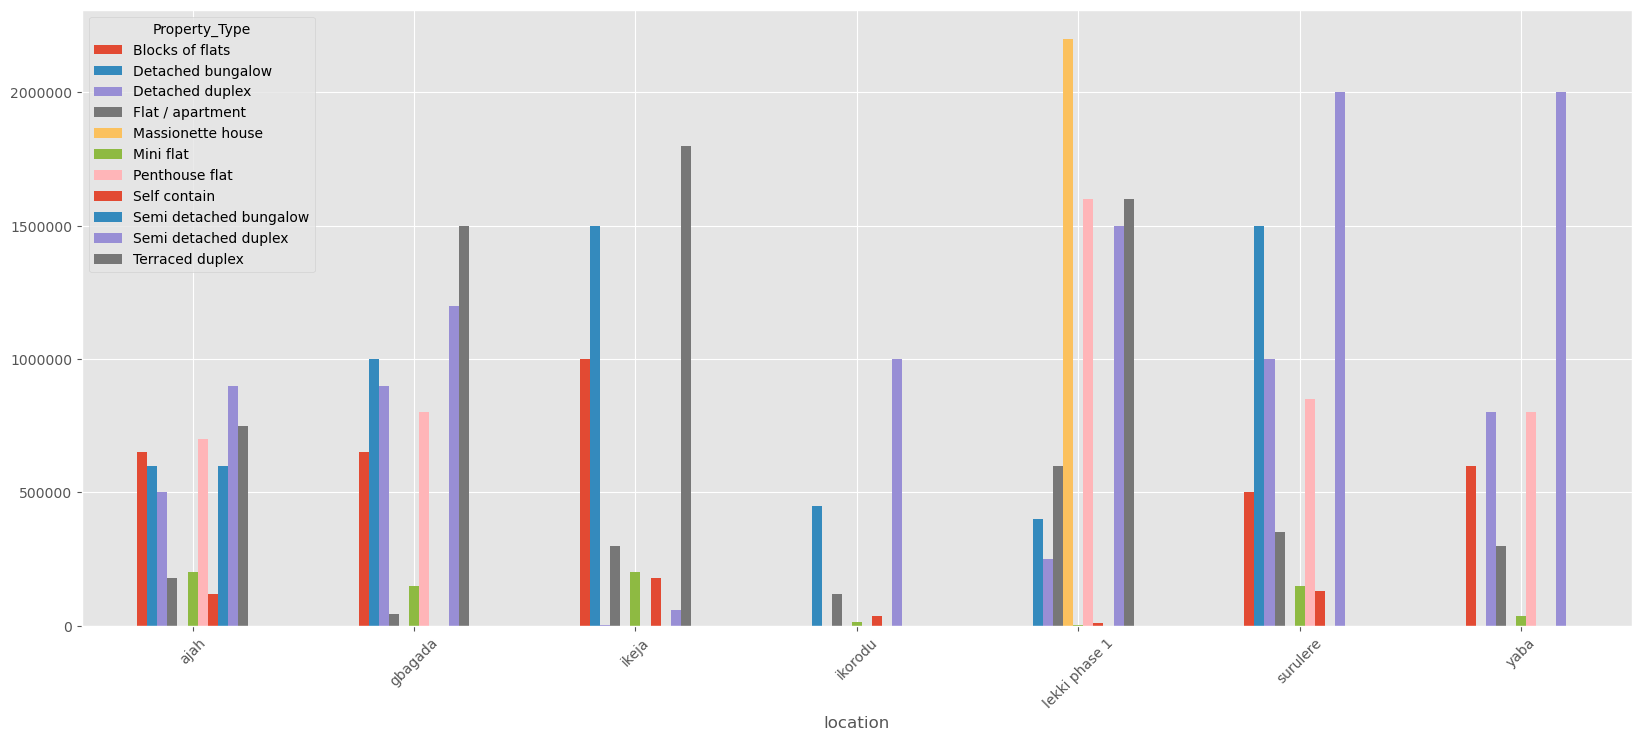

In [25]:
# plot a bar chart
self_location.plot.bar(figsize = (20, 8))
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation=45)
plt.show()

*Gbagada has the cheapest Self contain in Lagos followed by Yaba.*

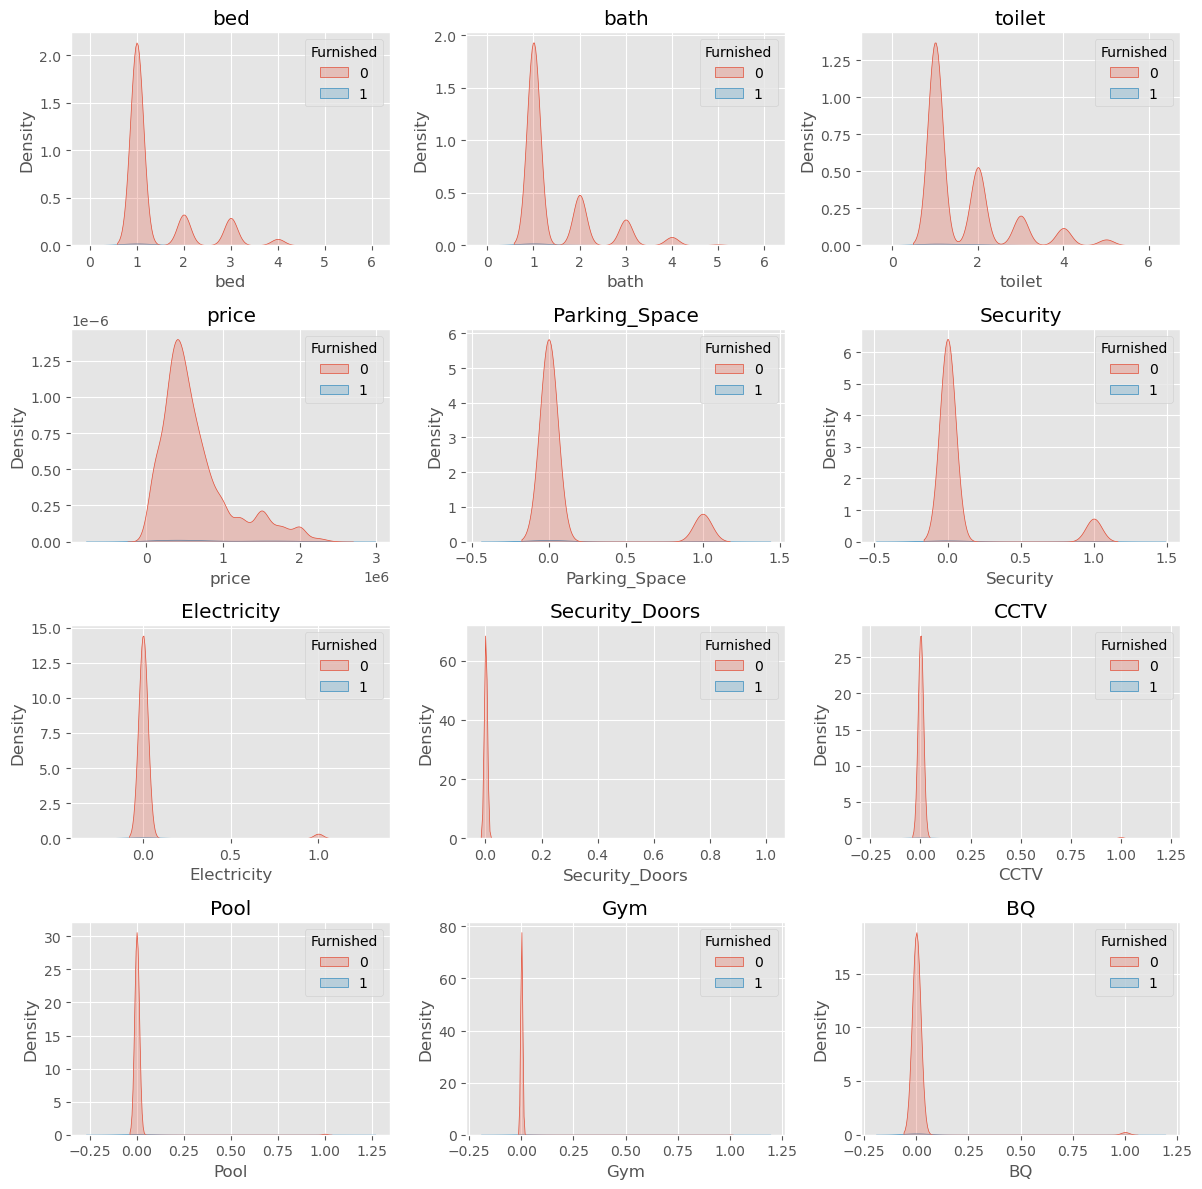

In [26]:
column = ['bed', 'bath', 'toilet', 'price', 'Parking_Space', 'Security', 'Electricity', 'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column and corresponding axes
for i, (col, ax) in enumerate(zip(column, axes)):
    # Plot the KDE plot for the current column using seaborn with 'hue' parameter
    sns.kdeplot(data=df, x=col, hue='Furnished', ax=ax, fill=True)
    ax.set_title(col)

# Adjust the spacing between subplots
fig.tight_layout()
plt.show()


## Multivariate Analysis
- considering the relationship between two or more variables and its visualization.

In [27]:
# Location, Property and Average Lagos Price
loc_property_price = df.groupby(['location', 'Property_Type'])['price'].mean().round().unstack('location')
loc_property_price 

location,ajah,gbagada,ikeja,ikorodu,lekki phase 1,surulere,yaba
Property_Type,,,,,,,
Blocks of flats,970000.0,1341667.0,1600000.0,NaN,NaN,925000.0,968182.0
Detached bungalow,1380000.0,1000000.0,1500000.0,450000.0,400000.0,1625000.0,NaN
Detached duplex,1789724.0,1350000.0,1613000.0,NaN,1125000.0,1533333.0,1828571.0
Flat / apartment,847303.0,1172016.0,1303878.0,385000.0,1527778.0,885616.0,915625.0
Massionette house,NaN,NaN,NaN,NaN,2200000.0,NaN,NaN
Mini flat,539420.0,530698.0,706899.0,152436.0,1415411.0,509955.0,465798.0
Penthouse flat,1000000.0,1300000.0,NaN,NaN,1600000.0,850000.0,1150000.0
Self contain,389791.0,506002.0,425571.0,115308.0,765629.0,590357.0,461831.0
Semi detached bungalow,1200000.0,NaN,NaN,NaN,NaN,NaN,NaN


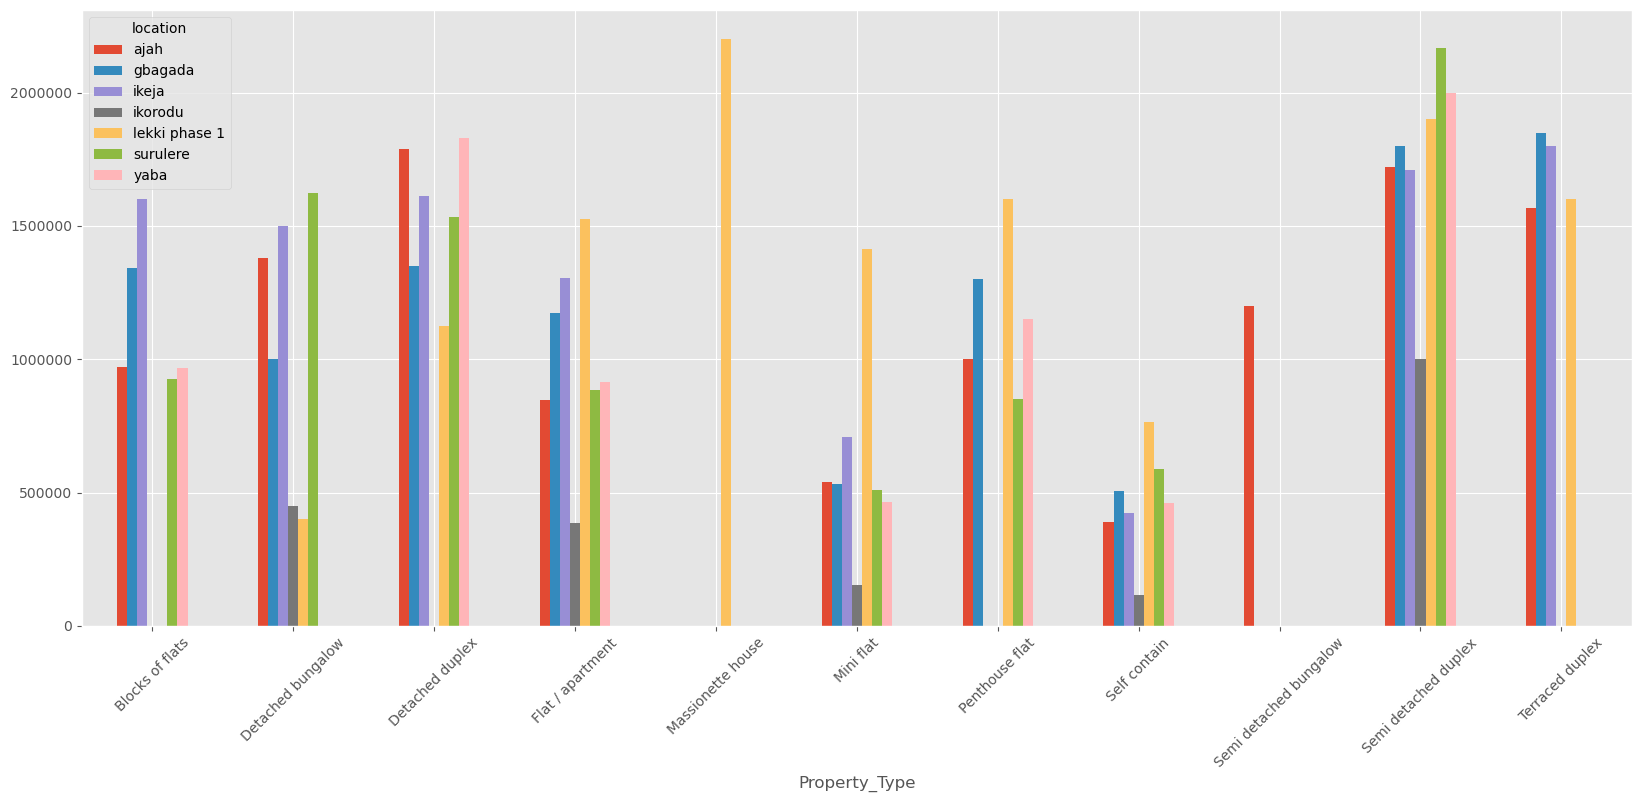

In [28]:
# plot the pivot table
loc_property_price.plot.bar(figsize = (20, 8))
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation=45)
plt.show()

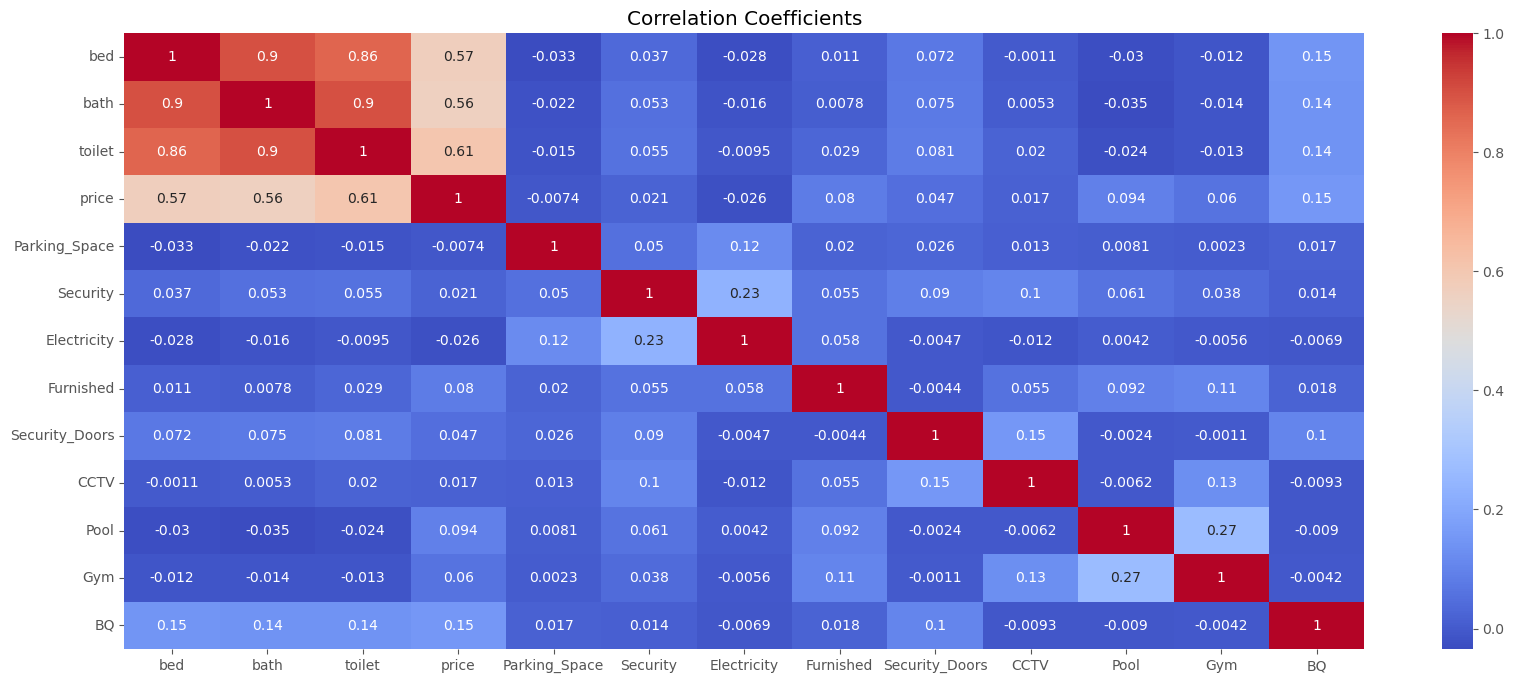

In [29]:
# Create a heatmap of correlation coefficients between numerical variables
corr = df[num_vars].corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Coefficients')
plt.show()

*The bed, toilet, and bath are a strong indicator for increase in Lagos house prices as they has a strong correlation between them and price, with a coefficient value of 0.57, 0.61, and 0.56, respectively.*

## Model Selection for Predicting Lagos House Prices
- It is a regression task. In this task we will be using the following algorithmns
  - Linear regression
  - Decision tree regression
  - Random forest regression
  - Lasso Regression


### Feature Selections
- The target is what you want to predict. In this case, we want to predict house prices.
- The independent variables after dropping the target is our X, which is what we are going to train our model.

In [30]:
# the target is usually named as y
y = df['price']
y.head()

0    700000.0
1    700000.0
2    650000.0
3    450000.0
4    800000.0
Name: price, dtype: float64

In [31]:
# select the independent variables
X = df.drop('price', axis = 1)
X.head()

,location,bed,bath,toilet,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,yaba,1,1,2,Mini flat,0,0,0,0,0,0,0,0,0
1,yaba,1,1,2,Mini flat,0,0,0,0,0,0,0,0,0
2,yaba,1,1,2,Mini flat,0,0,0,0,0,0,0,0,0
3,yaba,1,1,1,Mini flat,0,0,0,0,0,0,0,0,0
4,yaba,3,3,4,Detached duplex,0,1,0,0,0,0,0,0,0


## Label Encoding
- Coverting categorical columns to Numerical before model building.

In [32]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the X variables
for column in X.columns:
    X[column] = label_encoder.fit_transform(X[column])

# Now the X variables are encoded
X.head()

,location,bed,bath,toilet,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,6,0,0,1,5,0,0,0,0,0,0,0,0,0
1,6,0,0,1,5,0,0,0,0,0,0,0,0,0
2,6,0,0,1,5,0,0,0,0,0,0,0,0,0
3,6,0,0,0,5,0,0,0,0,0,0,0,0,0
4,6,2,2,3,2,0,1,0,0,0,0,0,0,0


## Train-Test-Split
We will split the dataset into training and testing set. Typically, we will allocate a certain percentage of 70-30 for training and testing, respectively. This will be done using the train_test_split function from scikit-learn.

In [33]:
from sklearn.model_selection import train_test_split

# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


       location  bed  bath  toilet  Property_Type  Parking_Space  Security  \
1362         6    0     0       0              5              0         0   
3665         3    0     0       0              5              0         0   

      Electricity  Furnished  Security_Doors  CCTV  Pool  Gym  BQ  
1362            0          0               0     0     0    0   0  
3665            0          0               0     0     0    0   0  

       location  bed  bath  toilet  Property_Type  Parking_Space  Security  \
1158         6    0     0       0              5              1         0   
1860         5    0     1       1              5              0         0   

      Electricity  Furnished  Security_Doors  CCTV  Pool  Gym  BQ  
1158            0          0               0     0     0    0   0  
1860            0          0               0     0     0    0   0  

 1362    300000.0
3665    100000.0
Name: price, dtype: float64

 1158    450000.0
1860    900000.0
Name: price, dtype: floa

In [34]:
# check the shape of the splitted data
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (3735, 14)
The X_test shape: (1601, 14)
The y_train shape: (3735,)
The y_test shape: (1601,)


## Standardization
- We will scale the features of the data using MinMax Scaler from scikit-learn.

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_test_scaled = scaler.transform(X_test)


In [36]:
# import the necessary libraries for the model building
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# algorithms for the evaluation of model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Linear Regression

In [37]:
lr_model = LinearRegression()

# fit the the model
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
# create predictions
y_pred = lr_model.predict(X_test_scaled)

In [39]:
# manually compare the lagos house price
print('Actual prices: ', y.head().tolist())
print('..........................................')
print('Predicted prices: ', np.round(y_pred[:5].tolist(), 2))

Actual prices:  [700000.0, 700000.0, 650000.0, 450000.0, 800000.0]
..........................................
Predicted prices:  [485285.11 666929.62 444590.9  475251.06 453444.47]


In [40]:
# model evaluation
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Linear Regression:', linear_r2.round(2))
print('MAE of Linear Regression:', linear_mae.round(2))
print('MSE of Linear Regression:', linear_mse.round(2))
print('RMSE of Linear Regression:', linear_rmse.round(2))

AttributeError: 'float' object has no attribute 'round'

- R2 (Coefficient of Determination): This metric measures the proportion of variance in the target variable that can be explained by the model's independent variables. An R2 value of 0.39 means that only 39% of the variance in the target variable is explained by the model's independent variables. The closer the R2 value is to 1, the better the model's performance.

- MAE (Mean Absolute Error): This metric measures the average absolute difference between the predicted and actual values of the target variable. A MAE value of 243679.76 means that, on average, the model's predictions are off by $243,679.76. The lower the MAE value, the better the model's performance.

- MSE (Mean Squared Error): This metric measures the average squared difference between the predicted and actual values of the target variable. A MSE value of 122385109367.73 means that, on average, the model's predictions are off by $122,385,109,367.73^2. The lower the MSE value, the better the model's performance.

- RMSE (Root Mean Squared Error): This metric is the square root of MSE and measures the average distance between the predicted and actual values of the target variable. A RMSE value of 349835.83 means that, on average, the model's predictions are off by $349,835.83. The lower the RMSE value, the better the model's performance.

In summary, an R2 value of 0.39 indicates that the Linear Regression model is not a good fit for the data and only explains a small portion of the variance in the target variable. The high values for MAE, MSE, and RMSE suggest that the model's predictions are far from the actual values of the target variable. Therefore, further analysis and improvements may be necessary to improve the model's performance.

#### Decision Tree

In [ ]:
dc_model = DecisionTreeRegressor()

# fit the the model
dc_model.fit(X_train_scaled, y_train)

In [ ]:
# create predictions
y_pred = dc_model.predict(X_test_scaled)

In [ ]:
# manually compare the lagos house price
print('Actual prices: ', y.head().tolist())
print('..........................................')
print('Predicted prices: ', np.round(y_pred[:5].tolist(), 2))

In [ ]:
# model evaluation
dc_mse = mean_squared_error(y_test, y_pred)
dc_r2 = r2_score(y_test, y_pred)
dc_mae = mean_absolute_error(y_test, y_pred)
dc_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Decision Tree Regressor:', dc_r2.round(2))
print('MAE of Decision Tree Regressor:', dc_mae.round(2))
print('MSE of Decision Tree Regressor:', dc_mse.round(2))
print('RMSE of Decision Tree Regressor:', dc_rmse.round(2))

- The R2 (Coefficient of Determination) of the Decision Tree Regressor model is 0.69. This means that approximately 69% of the variance in the target variable can be explained by the independent variables in the model. 

- The MAE (Mean Absolute Error) of the Decision Tree Regressor model is 158,664.84. This represents the average absolute difference between the predicted values and the actual values of the target variable. 

- The MSE (Mean Squared Error) of the Decision Tree Regressor model is 62,570,472,770.9. This represents the average squared difference between the predicted values and the actual values of the target variable. 

- The RMSE (Root Mean Squared Error) of the Decision Tree Regressor model is 250,140.91. This is the square root of the MSE and represents the average distance between the predicted values and the actual values of the target variable. 

*These metrics are used to evaluate the performance of the Decision Tree Regressor model. Lower values of MAE, MSE, and RMSE indicate better performance, while a higher R2 value indicates a better fit of the model to the data.*

#### Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor()

# fit the the model
rf_model.fit(X_train_scaled, y_train)

In [ ]:
# create predictions
y_pred = rf_model.predict(X_test_scaled)

In [ ]:
# manually compare the lagos house price
print('Actual prices: ', y.head().tolist())
print('..........................................')
print('Predicted prices: ', np.round(y_pred[:5].tolist(), 2))

In [ ]:
# model evaluation
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Random Forest Regressor:', rf_r2.round(2))
print('MAE of Random Forest Regressor:', rf_mae.round(2))
print('MSE of Random Forest Regressor:', rf_mse.round(2))
print('RMSE of Random Forest Regressor:', rf_rmse.round(2))

- The R2 (Coefficient of Determination) of the Random Forest Regressor model is 0.71. This means that approximately 71% of the variance in the target variable can be explained by the independent variables in the model.

- The MAE (Mean Absolute Error) of the Random Forest Regressor model is 155,569.77. This represents the average absolute difference between the predicted values and the actual values of the target variable.

- The MSE (Mean Squared Error) of the Random Forest Regressor model is 57,862,134,120.62. This represents the average squared difference between the predicted values and the actual values of the target variable.

- The RMSE (Root Mean Squared Error) of the Random Forest Regressor model is 240,545.49. This is the square root of the MSE and represents the average distance between the predicted values and the actual values of the target variable.

These metrics are used to evaluate the performance of the Random Forest Regressor model. Lower values of MAE, MSE, and RMSE indicate better performance, while a `higher R2 of 0.71 value indicates a better fit of the model to the data`.

#### Lasso Regression

In [ ]:
lasso_model =  Lasso(alpha = 0.5)

# fit the the model
lasso_model.fit(X_train_scaled, y_train)

In [ ]:
# create predictions
y_pred = lasso_model.predict(X_test_scaled)

In [ ]:
# manually compare the lagos house price
print('Actual prices: ', y.head().tolist())
print('..........................................')
print('Predicted prices: ', np.round(y_pred[:5].tolist(), 2))

In [ ]:
# model evaluation
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Lasso Regressor:', lasso_r2.round(2))
print('MAE of Lasso Regressor:', lasso_mae.round(2))
print('MSE of Lasso Regressor:', lasso_mse.round(2))
print('RMSE of Lasso Regressor:', lasso_rmse.round(2))

- The R2 (Coefficient of Determination) of the Lasso Regressor model is 0.39. This means that only 39% of the variance in the target variable can be explained by the independent variables in the model.

- The MAE (Mean Absolute Error) of the Lasso Regressor model is 243,679.07. This represents the average absolute difference between the predicted values and the actual values of the target variable.

- The MSE (Mean Squared Error) of the Lasso Regressor model is 122,384,434,508.69. This represents the average squared difference between the predicted values and the actual values of the target variable.

- The RMSE (Root Mean Squared Error) of the Lasso Regressor model is 349,834.87. This is the square root of the MSE and represents the average distance between the predicted values and the actual values of the target variable.

These metrics are used to evaluate the performance of the Lasso Regressor model. Lower values of MAE, MSE, and RMSE indicate better performance, while a `Lower R2 value pf 0.39 indicates a poor fit of the model to the data.`

### Model Conclusion
*Random Forest Regressor has shown a good performance among the other models based on the evaluation metrics, a R2_score of 0.71 compared to others means that it is a good fit of the model on the data. It means that the model is able to explain 71% of the target variable(y) by the independent variables.*

## Feature Importance and Engineering
*After training the best performing model which is Random Forest, we will analyze feature importance. We want to see which features of the independent variables contribute to the performance of the Random Forest model, and use it to retrain and vaidate our model.*

In [ ]:
# Feature importances using Random Forest
feature_importances = rf_model.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key = lambda x: x[1], reverse = True)

for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance}')

In [ ]:
# Plot the feature importance using Random Forest
feature_importances = rf_model.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key = lambda x: x[1], reverse = False)

# Create a horizontal bar chart to display feature importances
plt.figure(figsize = (20, 8))
plt.barh(range(len(sorted_feature_importance)), [val[1] for val in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [val[0] for val in sorted_feature_importance])
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add data labels to the chart
for i, v in enumerate([val[1] for val in sorted_feature_importance]):
    plt.text(v, i, str(round(v, 3)))

plt.show()


### A Bit of Feature Selection
*We can see that toilet, location, security, furnished, property_type, bed, and bath contribute majorly to the performance of the Random Forest model. We will use these aforementioned features to retrain and valdate the model.*

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection using SelectKBest with f_regression score function
selector = SelectKBest(score_func=f_regression, k=7)  # Select top 7 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

### Model Training
*We will fit our best performing random forest model on the selected features and make predictions on the validation set*

In [ ]:
# Train a linear regression model on the selected features
model = RandomForestRegressor()
model.fit(X_train_selected, y_train)

# create predictions
y_pred = model.predict(X_test_selected)

In [ ]:
# manually compare the lagos house price
print('Actual prices: ', y.head().tolist())
print('..........................................')
print('Predicted prices: ', np.round(y_pred[:5].tolist(), 2))

### Hyperparameter Tuning of Model using K-fold Cross Validation 

In [ ]:
# Create a dictionary of scoring metrics
scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# Use cross_validate to evaluate the model with multiple metrics
cv_results = cross_validate(model, X_train_selected, y_train, cv=10, scoring=scoring)

# Extract the results for each metric
mse_scores = cv_results['test_neg_mean_squared_error']
mae_scores = cv_results['test_neg_mean_absolute_error']
r2_scores = cv_results['test_r2']

# Calculate the mean score for each metric
mse_mean = -mse_scores.mean()  # Convert negative MSE to positive
mae_mean = -mae_scores.mean()  # Convert negative MAE to positive
r2_mean = r2_scores.mean()

print(f"Mean Squared Error: {mse_mean}")
print(f"Mean Absolute Error: {mae_mean}")
print(f"R-squared: {r2_mean}")

*In the model's evaluation, the Mean Squared Error (MSE) indicates that, on average, our predictions deviate by approximately 61,332,946,51 units from the actual values. The Mean Absolute Error (MAE) shows a lower average deviation of around 161,889.83 units. Additionally, the model's R-squared (R²) value of 0.72 suggests that it effectively explains approximately 72% of the variance in the data, signifying a reasonably good fit between your model and the observed values.*

## Recommendations
Based on the analysis and model building for Lagos house price prediction, here are some key recommendations:

1. **Location Matters:** Consider the location carefully when buying or selling a house. Locations like Yaba and Lekki-Phase 1 have significantly higher average house prices compared to areas like Ikorodu. Understanding the specific neighborhoods and their price dynamics is crucial.

2. **Property Type:** Property type plays a significant role in house prices. Mini flats are in high demand, while Massionette houses are relatively rare. If you're investing, consider property types that are in demand in a particular area.

3. **Bed, Bath, and Toilet Configuration:** The number of bedrooms, bathrooms, and toilets strongly correlates with house prices. Investing in properties with these features can potentially increase the resale or rental value.

4. **Amenities:** Evaluate the presence of amenities like parking spaces, security, electricity, furnished apartments, security doors, CCTV facilities, swimming pools, gym facilities, and BQ. These amenities can make your property more attractive to potential buyers or renters.

5. **Target Price Range:** Understanding the typical price range that most residents pay for houses in Lagos (e.g., 500,000 and above) can help you set a competitive but realistic price for your property.

6. **Use Random Forest Regressor:** The Random Forest Regressor model has shown good performance in predicting house prices. It can be a reliable choice for modeling and predicting property prices in Lagos.

7. **Retrain the Model:** Focus on the features that contribute significantly to the model's performance, such as toilet, location, security, furnished status, property type, bed, and bath. Retraining the model with these key features can lead to more accurate predictions.

8. **Monitor CCTV Facilities:** If you're looking for properties with specific amenities, like CCTV facilities, consider locations like Surulere and Ikorodu, which have a higher number of such facilities.

9. **Consider Seasonal Variations:** Keep in mind that house prices may vary seasonally or due to market conditions. Regularly monitor the real estate market to make informed decisions.

10. **Keep an Eye on Self Contain Units:** Self contain units are among the more affordable options in Lagos. If you're on a budget, Gbagada and Yaba offer relatively lower prices for this property type.

These recommendations can help buyers, sellers, and real estate investors make informed decisions in the dynamic Lagos housing market.